#Answer no 2

#Salary_data Set

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')


#Importing data

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data (1).csv


In [ ]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#Performing EDA On Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


#Checking for Null Values

In [ ]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

#Checking for Duplicate Values

In [ ]:
df[df.duplicated()].shape

(0, 2)

In [ ]:
df[df.duplicated()]

,YearsExperience,Salary


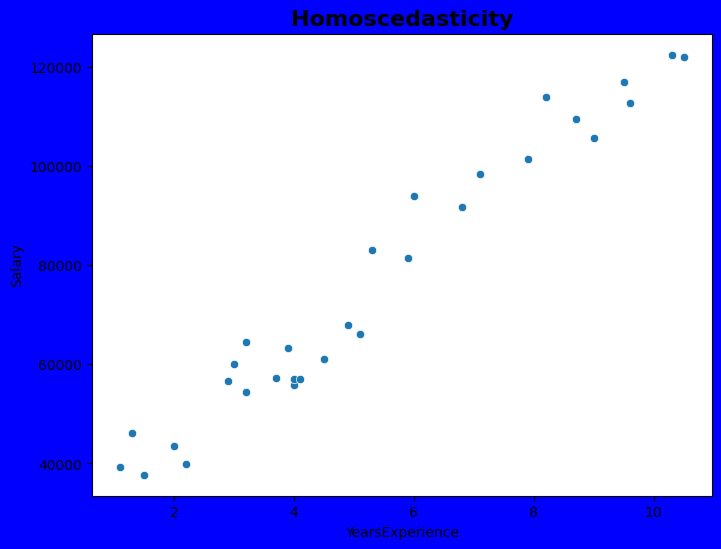

In [ ]:
plt.figure(figsize = (8,6), facecolor = 'blue')
sns.scatterplot(x = df['YearsExperience'], y = df['Salary'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [ ]:
df.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

#As you can see in above graph
It shows as the Salary Increases the Years of Experience increases with very less variation along the way in data

The data doesn't have any specific pattern in the variation. hence, we can say it's Homoscedasticity

#Checking the Correlation between variables


In [ ]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#As you can see above
There is good correlation between the two variable.

The score is more than 0.8 which is a good sign

#Plotting the data to check for outliers

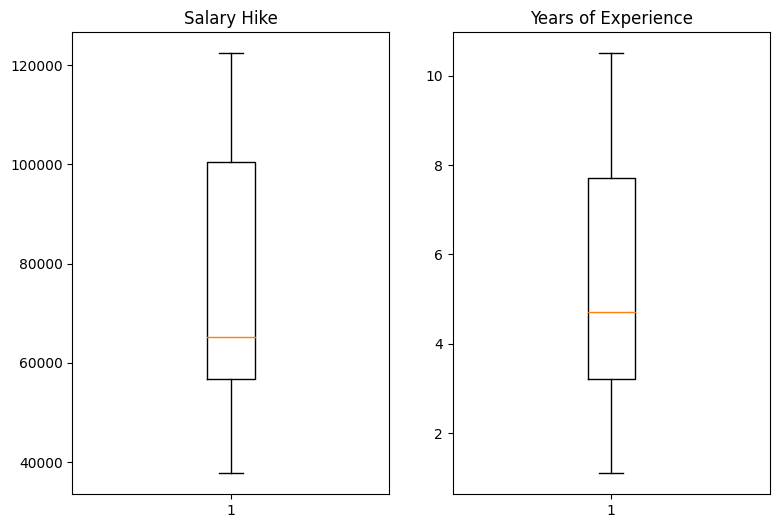

In [ ]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(df['YearsExperience'])
plt.title('Years of Experience')
plt.show()

#As you can see there are no Outliers in the data

Trying different transformation of data to estimate normal distribution and remove any skewness

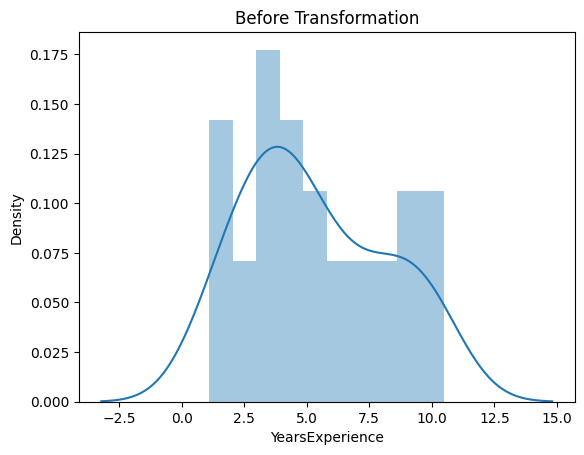

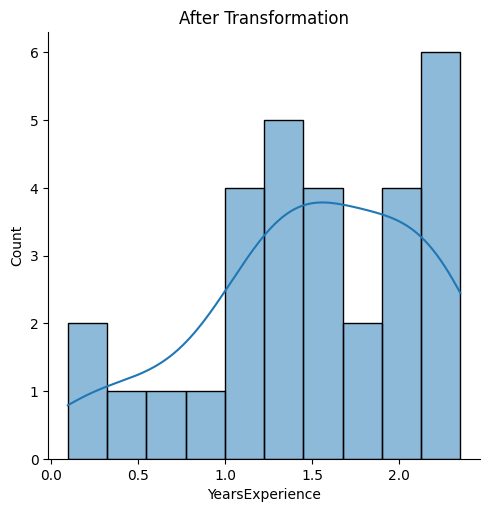

In [ ]:
sns.distplot(df['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

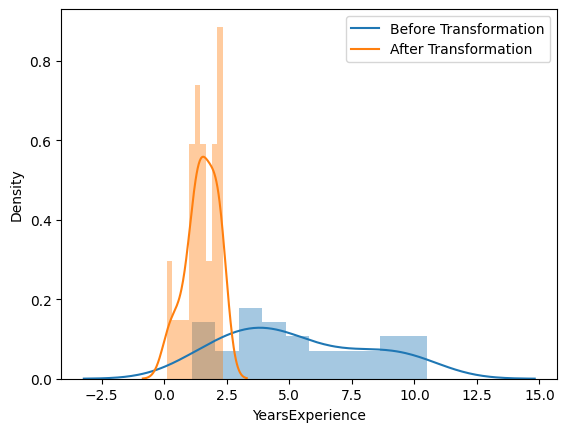

In [ ]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['YearsExperience'], bins = 10, kde = True)
sns.distplot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

#As we can see

How log transformation affects the data and it scales the values down.

Before prediction it is necessary to reverse scaled the values, even for calculating RMSE for the models.(Errors)

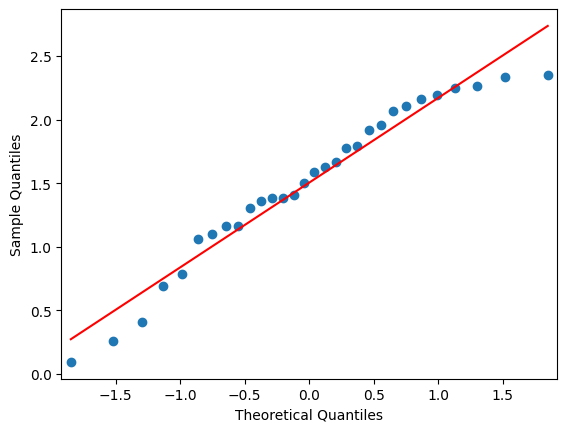

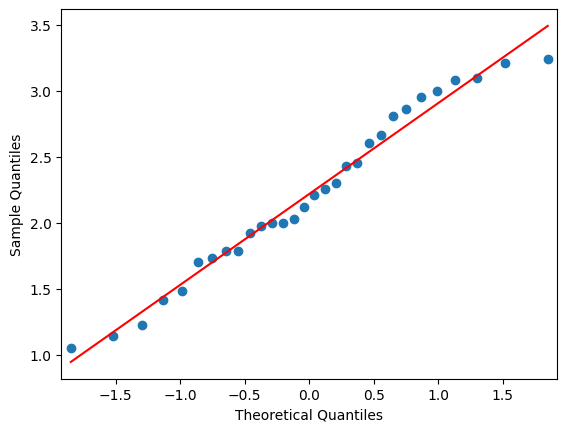

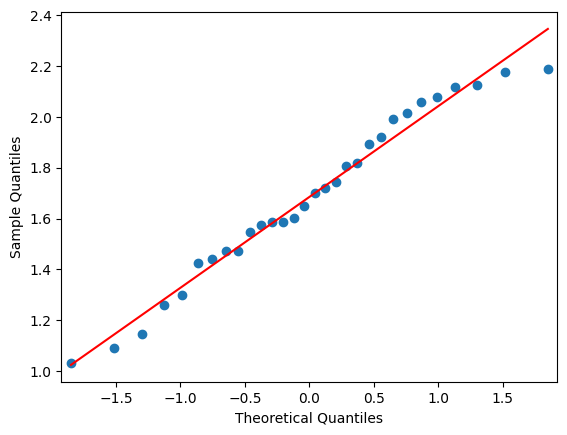

In [ ]:
smf.qqplot(np.log(df['YearsExperience']), line = 'r')
smf.qqplot(np.sqrt(df['YearsExperience']), line = 'r')
smf.qqplot(np.cbrt(df['YearsExperience']), line = 'r')
plt.show()

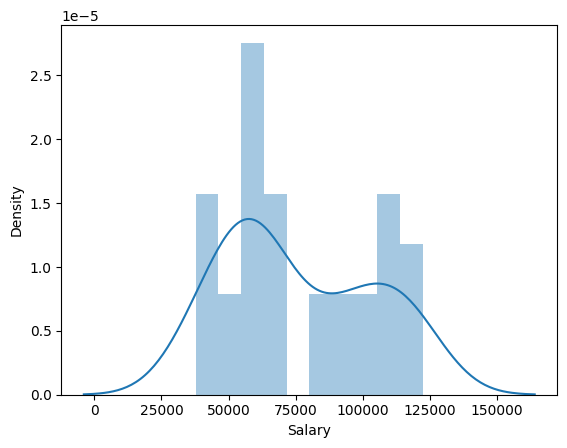

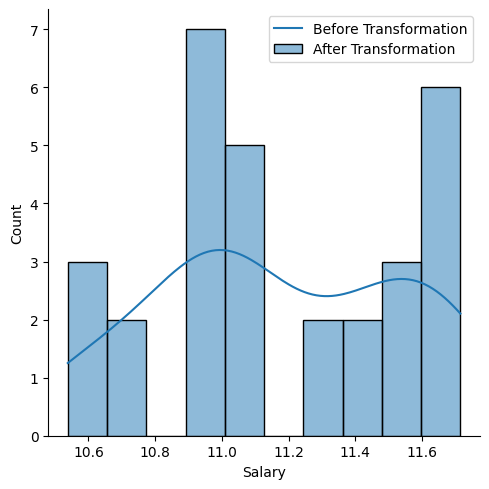

In [ ]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Salary'], bins = 10, kde = True)
sns.displot(np.log(df['Salary']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

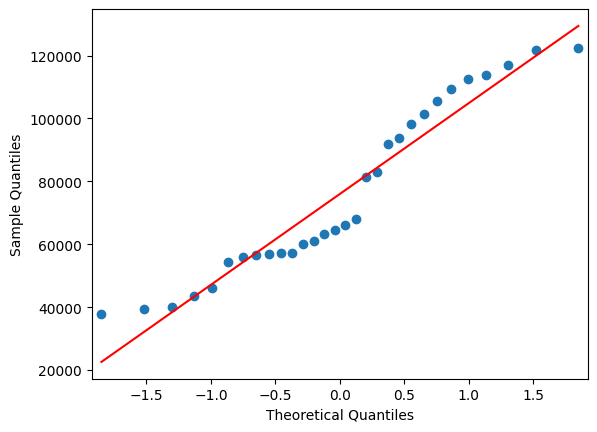

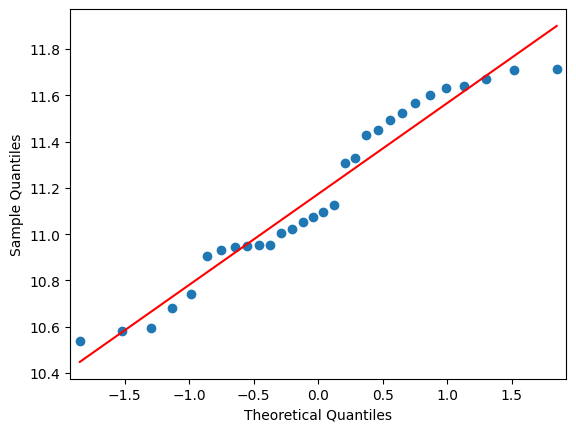

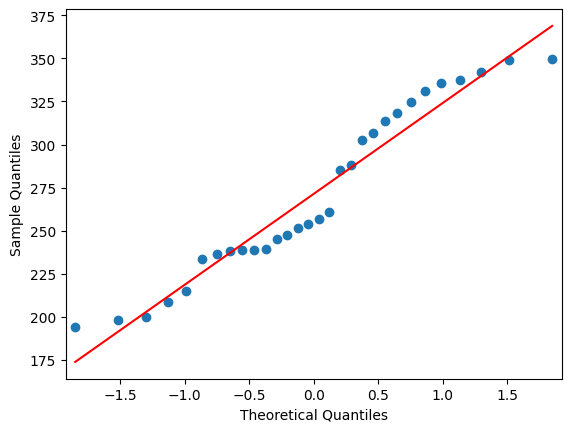

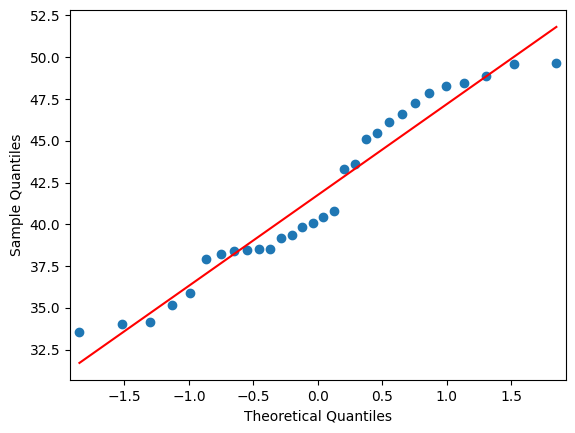

In [ ]:
smf.qqplot(df['Salary'], line = 'r')
smf.qqplot(np.log(df['Salary']), line = 'r')
smf.qqplot(np.sqrt(df['Salary']), line = 'r')
smf.qqplot(np.cbrt(df['Salary']), line = 'r')
plt.show()

#Fitting a Linear Regression Model

In [ ]:
import statsmodels.formula.api as sm
model = sm.ols('Salary~YearsExperience', data = df).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           1.14e-20
Time:                        12:56:49   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


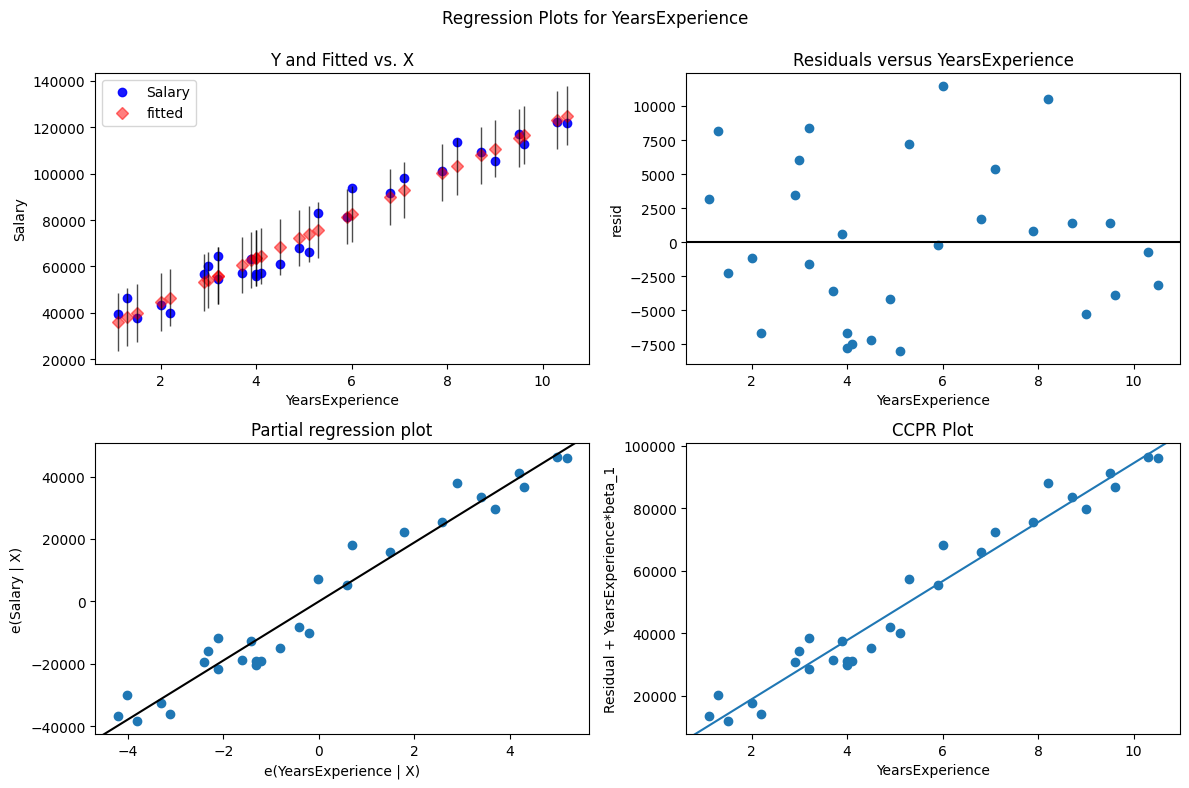

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = smf.graphics.plot_regress_exog(model, 'YearsExperience', fig=fig)

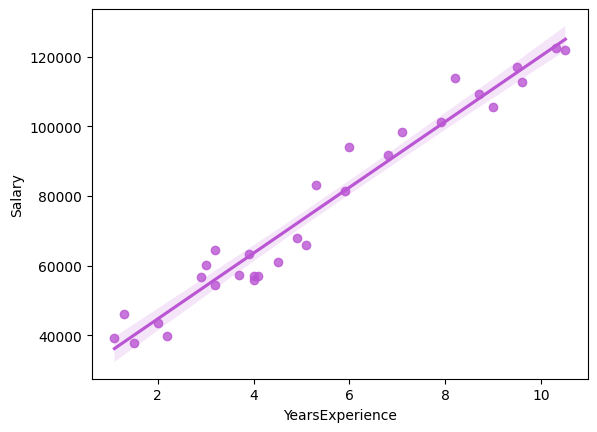

In [ ]:
sns.regplot(x = 'YearsExperience',  y = 'Salary', data = df, color = 'mediumorchid')
plt.show()

Log transformation on dependent variable

In [ ]:
model1 = sm.ols('np.log(Salary)~YearsExperience', data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           7.03e-18
Time:                        12:56:50   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Log transformation on both dependent as well as independent variable

In [ ]:
model2 = sm.ols('np.log(Salary)~np.log(YearsExperience)', data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           7.40e-16
Time:                        12:56:50   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


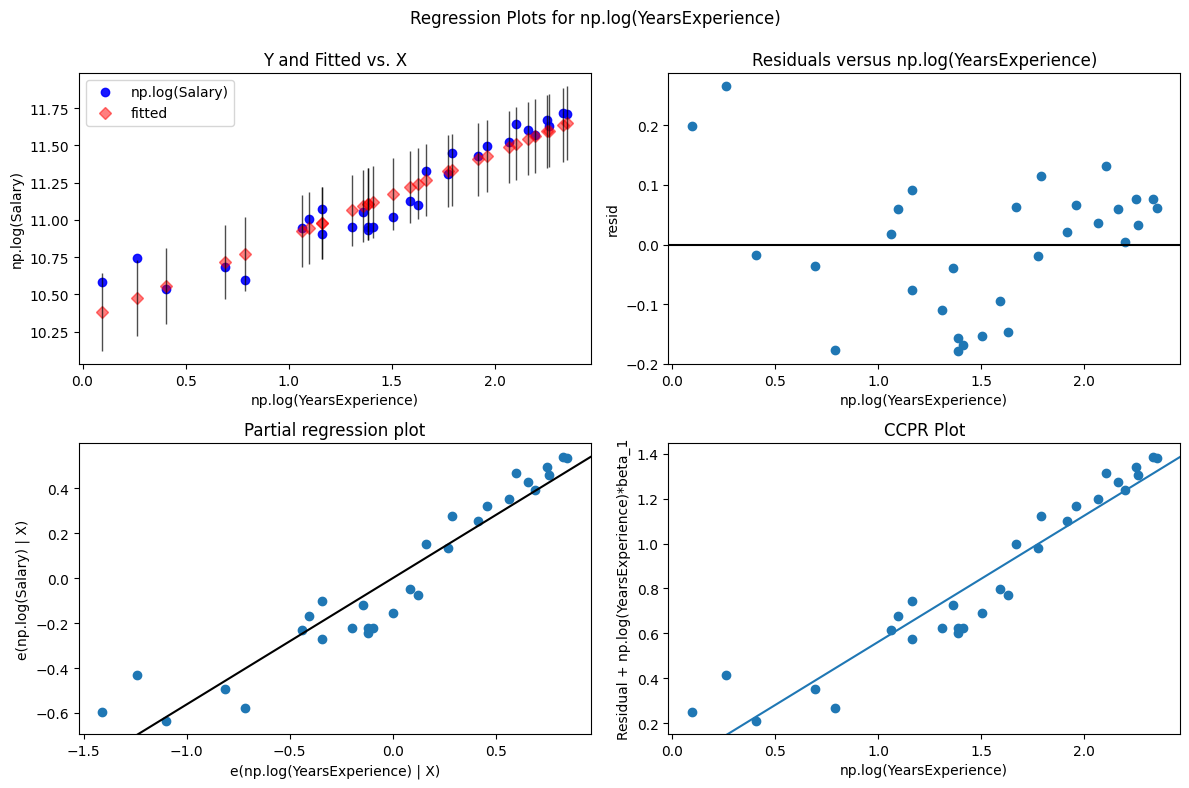

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = smf.graphics.plot_regress_exog(model2, 'np.log(YearsExperience)', fig=fig)

#Log transformation on dependent and independent variable + square transformation on independent variable

In [ ]:
model3 = sm.ols('np.log(Salary)~np.log(YearsExperience)+np.square(YearsExperience)', data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     198.0
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           7.38e-17
Time:                        12:56:52   Log-Likelihood:                 29.138
No. Observations:                  30   AIC:                            -52.28
Df Residuals:                      27   BIC:                            -48.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     10.4654      0.060    173.912      0.000      10.342      10.589
np.log(YearsExperience)        0.3769      0.059      6.423      0.000       0.257       0.497
np.square(YearsExperience)     0.0039      0.001      3.618      0.001       0.002       0.006
==============================================================================
Omnibus:                        1.516   Durbin-Watson:                   1.477
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                1.067
Skew:                           0.163   Prob(JB):                        0.587
Kurtosis:                       2.136   Cond. No.                         228.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Plotting differente plots of the model to check the regression line

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
lm = LinearRegression()

x = df['YearsExperience'].values.reshape(-1,1)
y = df['Salary'].values.reshape(-1,1)

reg_sklearn = lm.fit(x,y)

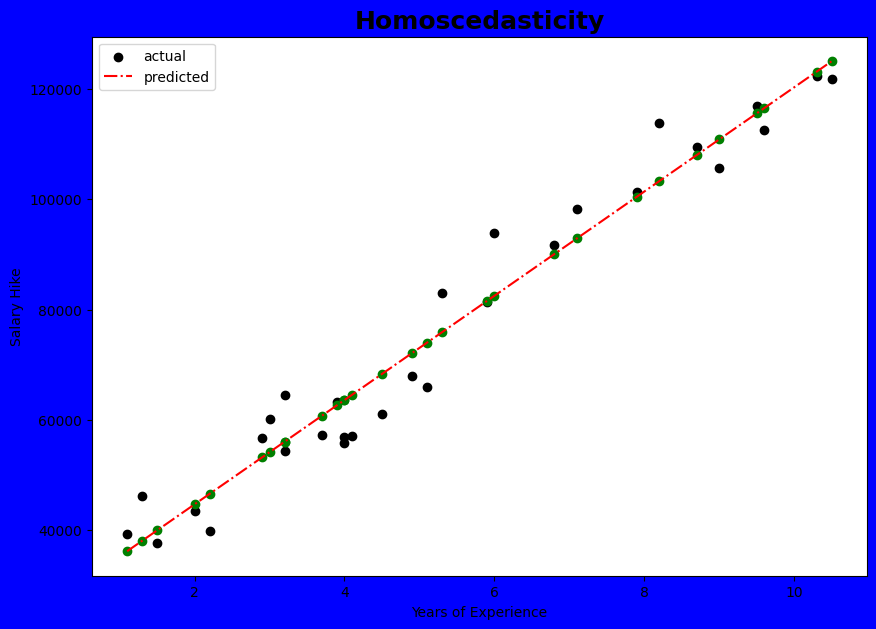

In [ ]:
plt.figure(figsize=(10,7), facecolor ='blue')
plt.scatter(df['YearsExperience'], df['Salary'], color = 'black', label='actual')
plt.plot(df['YearsExperience'], reg_sklearn.predict(x), color = 'red', linestyle='-.', label = 'predicted')
plt.scatter(df['YearsExperience'], reg_sklearn.predict(x), color = 'green')
plt.xlabel('Years of Experience')
plt.ylabel("Salary Hike")
plt.title('Homoscedasticity', fontsize = 18, fontweight = 'bold')
plt.legend(loc='best')
plt.show()

#Model Validation

We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value.

Comparing different models with respect to the Root Mean Squared Errors

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
model1_pred_y =np.exp(model1.predict(df['YearsExperience']))
model2_pred_y =np.exp(model2.predict(df['YearsExperience']))
model3_pred_y =np.exp(model3.predict(df['YearsExperience']))

In [ ]:
model1_rmse =np.sqrt(mean_squared_error(df['Salary'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(df['Salary'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(df['Salary'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)


model= 5788.315051119395 
model1= 7213.235076620168 
model2= 7219.716974372806 
model3= 6427.430081577282


In [ ]:
rmse = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(rmse, key=rmse.get)

'model'

#As model has the minimum RMSE and highest Adjacent R-squared score. Hence, we are going to use model to predict our values

Model is that Simple Linear regression model where we did not perfrom any data transformation and got the highest adjacent R-squared value

#Predicting values

In [ ]:
# first model results without any transformation
predicted2 = pd.DataFrame()
predicted2['YearsExperience'] = df.YearsExperience
predicted2['Salary'] = df.Salary
predicted2['Predicted_Salary_Hike'] = pd.DataFrame(model.predict(predicted2.YearsExperience))
predicted2

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [ ]:
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', pow(np.sqrt(model1.mse_resid),10),'\n' 'model2=', np.sqrt(np.exp(model2.mse_resid)),'\n' 'model3=', np.sqrt(np.exp(model3.mse_resid)))


model= 5788.315051119395 
model1= 8.082591248871045e-11 
model2= 1.0066980899940352 
model3= 1.0046733089816207


#Trying different models

In [ ]:
model4 = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = df).fit()
print(np.sqrt(model4.mse_resid))

12.178298906837782


In [ ]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           7.58e-19
Time:                        13:01:43   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model5 = sm.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           6.37e-18
Time:                        13:01:43   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Notes:
# Standard Errors assume that the covariance matrix of the errors is correctly specified.

#As you can see above the adjacent R-squared value is getting lower there is no point on going forward

# Answer no 1


#delivery_time Data set

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time.csv


In [ ]:
df = pd.read_csv("delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
#Renaming all columns
df = df.rename({'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'}, axis = 1)

In [ ]:
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


#EDA

In [ ]:
df.shape

(21, 2)

In [ ]:
df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
df.tail()

,Delivery_Time,Sorting_Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [ ]:
df.dtypes

Delivery_Time    float64
Sorting_Time       int64
dtype: object

In [ ]:
#check for missing values
df.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

<Axes: >

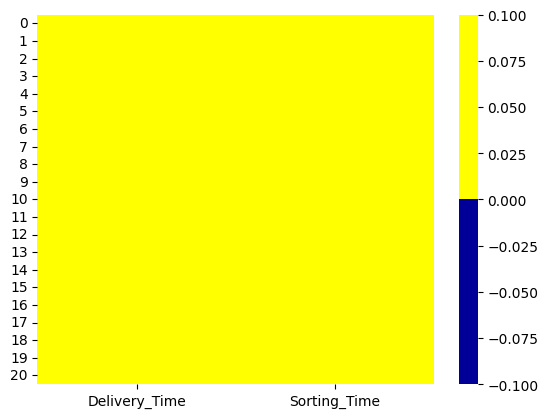

In [ ]:
#to genrate heat map

cols = df.columns
colors = ['#000099', '#ffff00']   #define colors, yellow for missing, blue for non missing
sns.heatmap(df[cols].isnull(),
               cmap= sns.color_palette(colors))

In [ ]:
#to check for duplicate rows
df[df.duplicated()].shape

(0, 2)

In [ ]:
df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff136691360>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff136693460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff136692290>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff136693970>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff136692500>],
 'means': []}

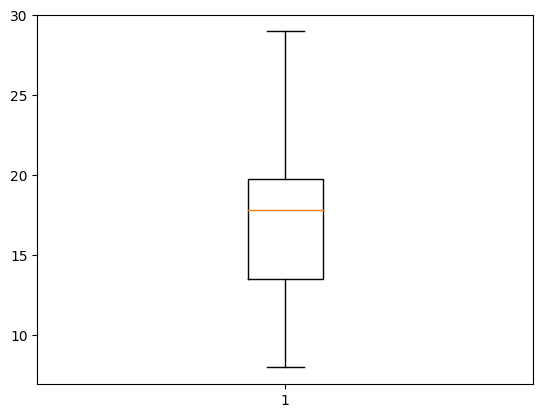

In [ ]:
#Outlier Detection

plt.boxplot(df['Delivery_Time'])

<Axes: xlabel='Delivery_Time', ylabel='Density'>

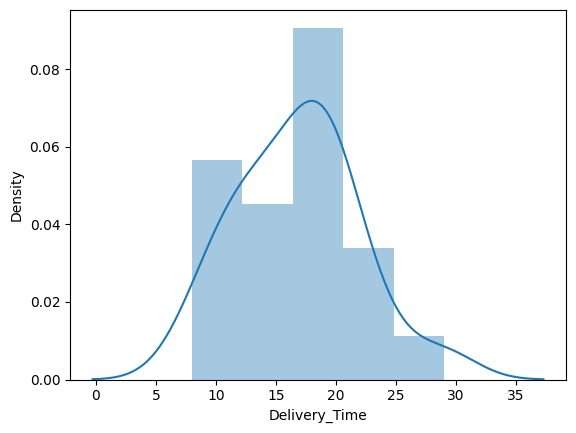

In [ ]:
sns.distplot(df.Delivery_Time)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff135a56650>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff135a56b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff135a563b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff135a570d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff135a57370>],
 'means': []}

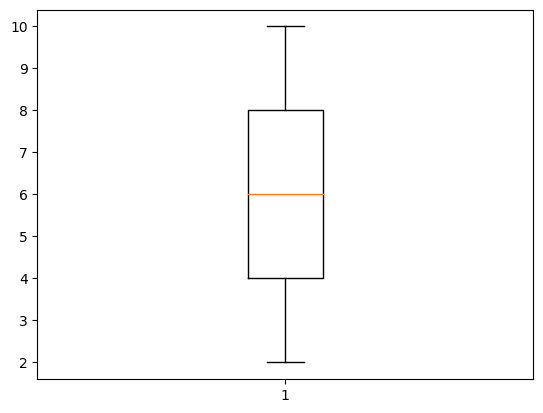

In [ ]:

plt.boxplot(df['Sorting_Time'])

<Axes: xlabel='Sorting_Time', ylabel='Density'>

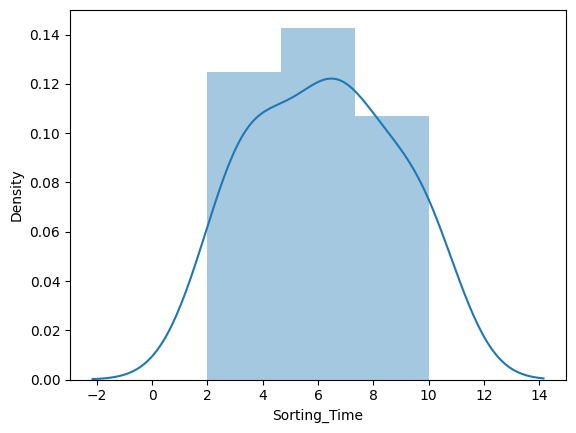

In [ ]:

sns.distplot(df.Sorting_Time)

#Performing Transformation on each column

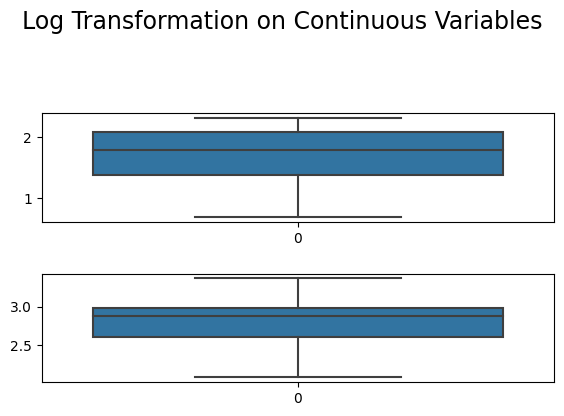

In [ ]:
fig, ax=plt.subplots(2, figsize=(6,4), sharex= False, sharey = False)
sns.boxplot(np.log(df.Sorting_Time), ax=ax[0])
sns.boxplot(np.log(df.Delivery_Time), ax=ax[1])
plt.suptitle("Log Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

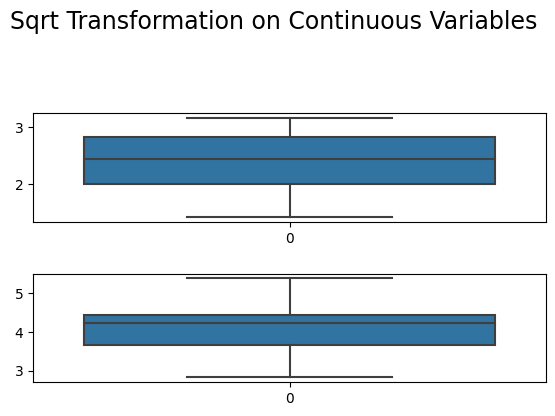

In [ ]:

fig, ax=plt.subplots(2, figsize=(6,4), sharex= False, sharey = False)
sns.boxplot(np.sqrt(df.Sorting_Time), ax=ax[0])
sns.boxplot(np.sqrt(df.Delivery_Time), ax=ax[1])
plt.suptitle("Sqrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

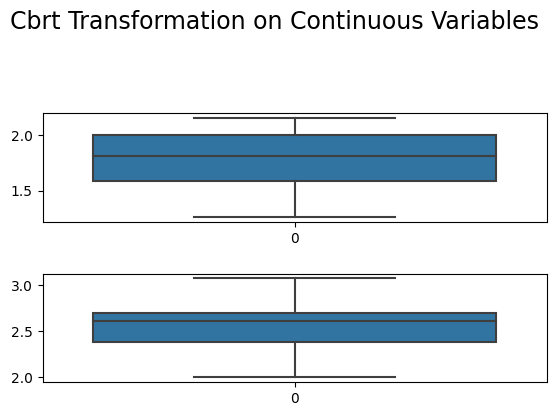

In [ ]:

fig, ax=plt.subplots(2, figsize=(6,4), sharex= False, sharey = False)
sns.boxplot(np.cbrt(df.Sorting_Time), ax=ax[0])
sns.boxplot(np.cbrt(df.Delivery_Time), ax=ax[1])
plt.suptitle("Cbrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

#Correlation

In [ ]:

#Correlation coef
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


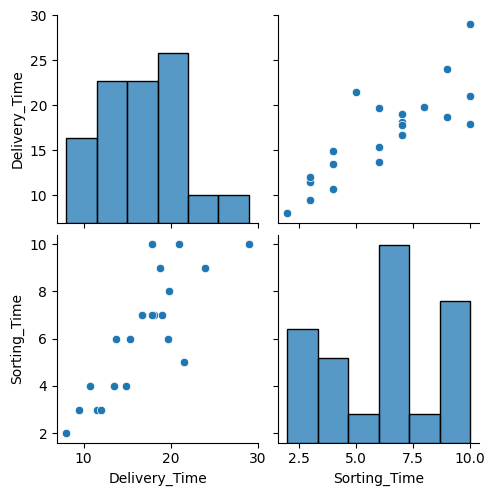

In [ ]:

sns.pairplot(df)

#Fitting a Regression Equation

In [ ]:

import statsmodels.formula.api as smf

In [ ]:

model = smf.ols("Delivery_Time~Sorting_Time", data=df).fit()

In [ ]:
#model parameters
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [ ]:
#get t-values & p-values
print(model.tvalues, '\n',model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [ ]:
#r squared value
model.rsquared

0.6822714748417231

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

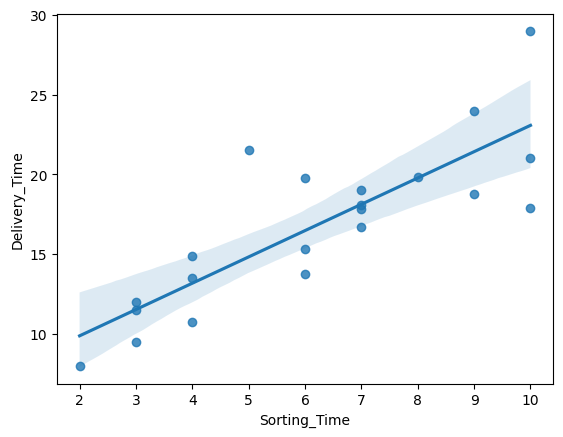

In [ ]:
sns.regplot(x = "Sorting_Time", y = "Delivery_Time", data = df)

In [ ]:

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           3.98e-06
Time:                        13:19:11   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Residual Analysis

Test for Noramlity of Residual through QQ plot

In [ ]:

import statsmodels.api as sm

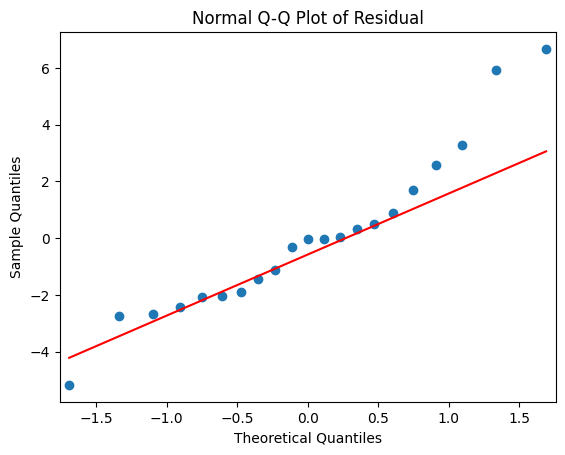

In [ ]:

#q line is the 45 degrees line
qqplot = sm.qqplot(model.resid, line= 'q')
plt.title('Normal Q-Q Plot of Residual')
plt.show()

In [ ]:
list(np.where(model.resid>6))

[array([20])]

#Residual plot for Homoscedasticity

In [ ]:

def get_standardize_values( vals):
  return (vals - vals.mean())/vals.std() # get standardized values of fitted values and residual

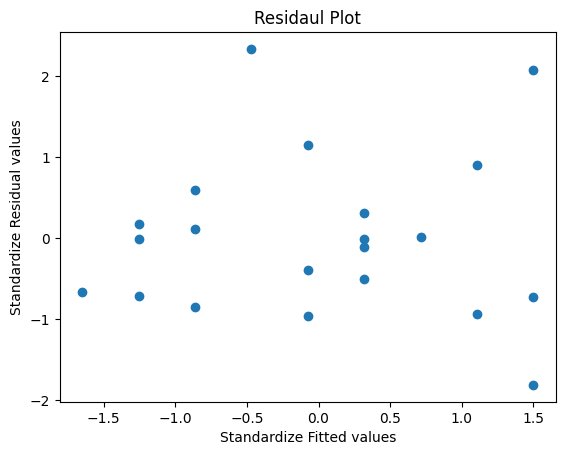

In [ ]:

plt.scatter(get_standardize_values(model.fittedvalues), get_standardize_values(model.resid))
plt.ylabel('Standardize Residual values')
plt.xlabel('Standardize Fitted values')
plt.title('Residaul Plot')
plt.show()

#Residual vs Regressors

eval_env: 1


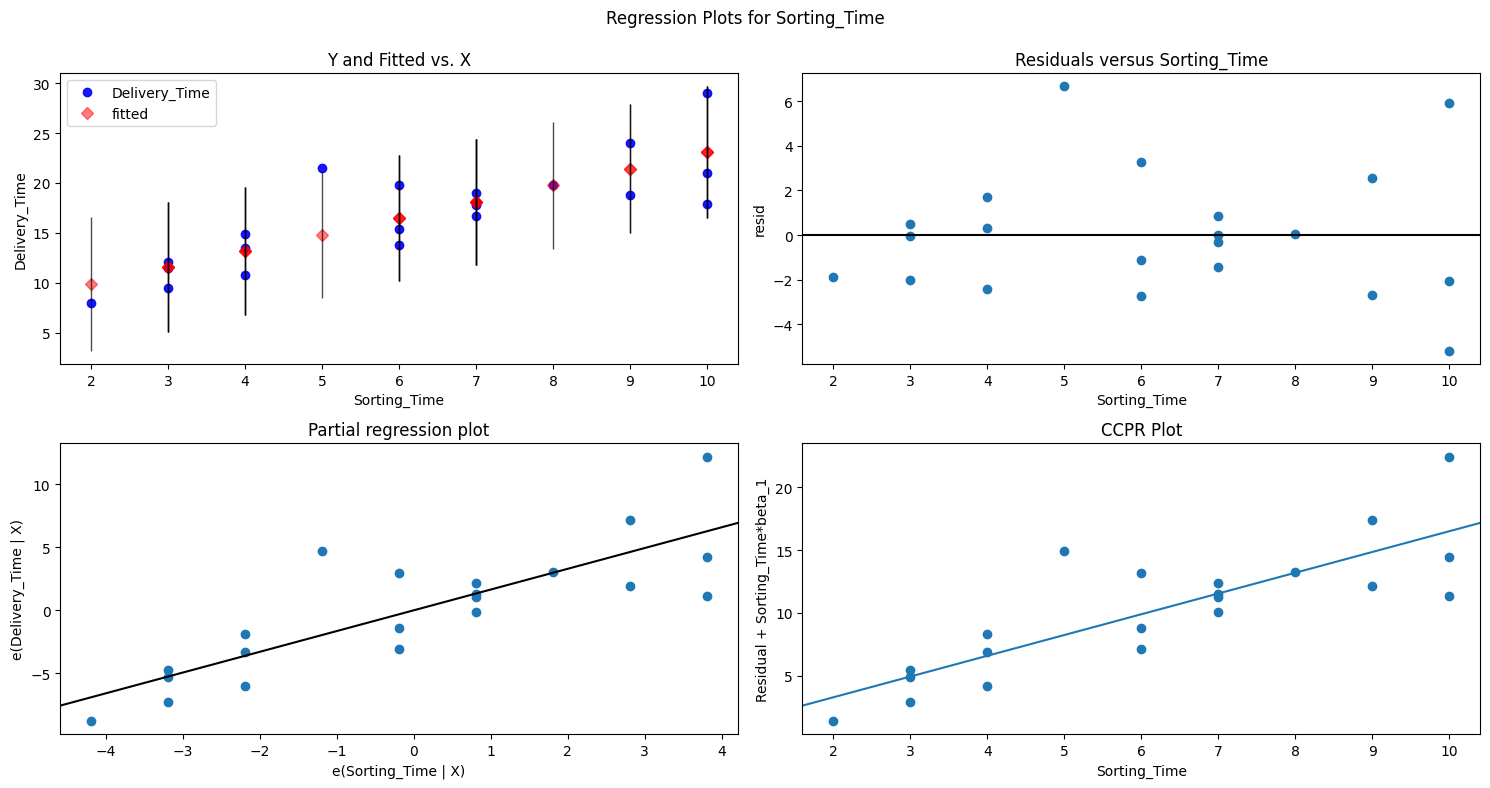

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Sorting_Time", fig=fig)
plt.show()

#Model Deletion by Cook's Distance and Leverage value

In [ ]:

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

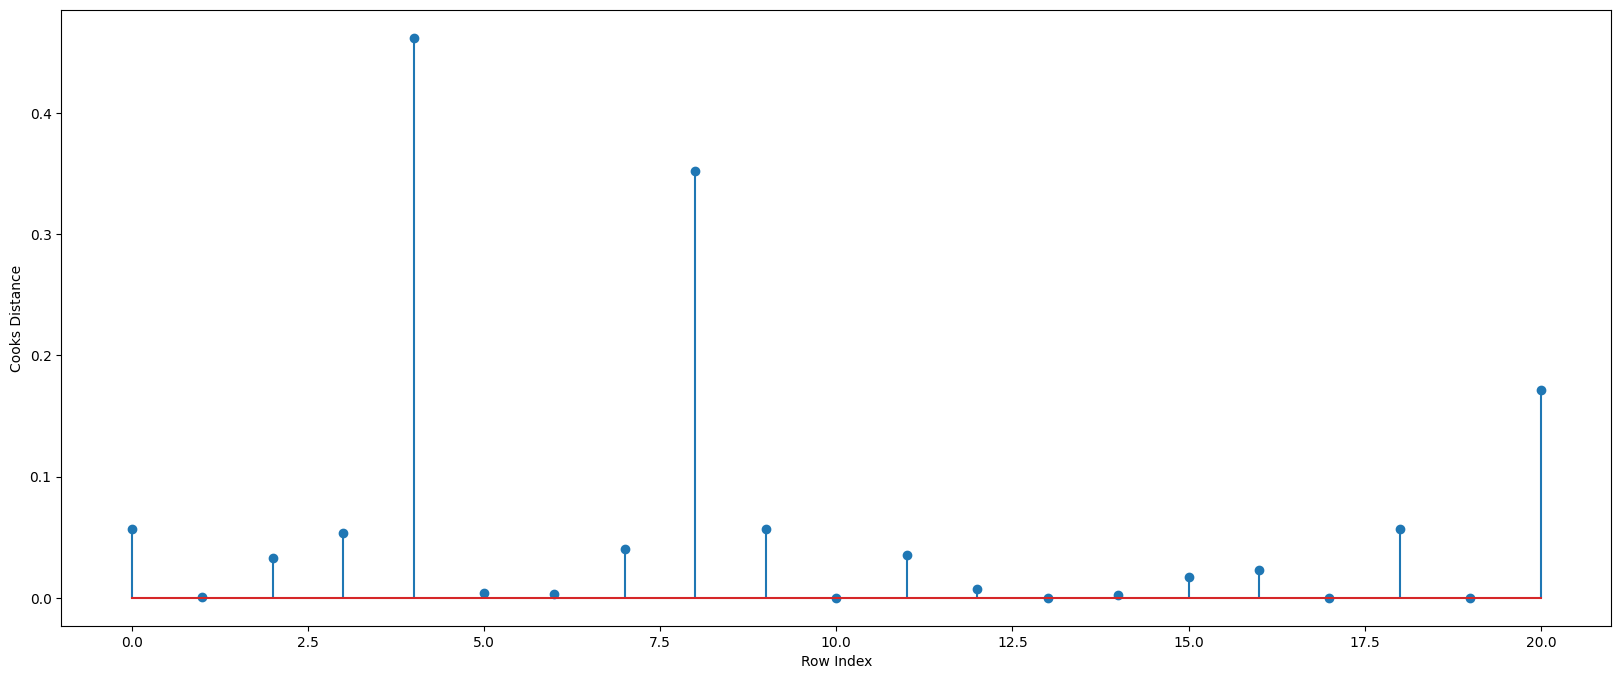

In [ ]:

#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(df)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:

#index and values of influencers where c is more than .5
(np.argmax(c), np.max(c))

(4, 0.462053041265031)

In [ ]:

from statsmodels.graphics.regressionplots import influence_plot

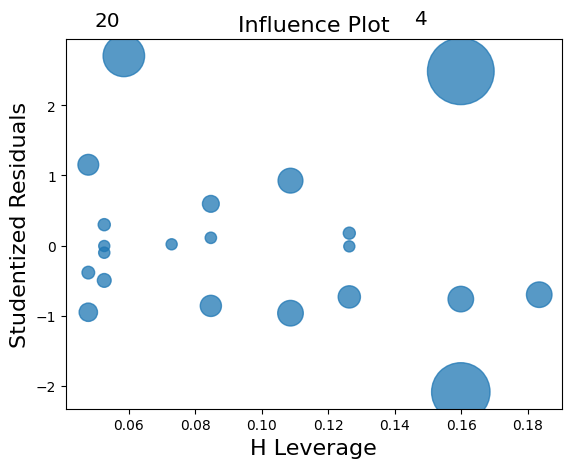

In [ ]:

influence_plot(model)
plt.show()

#Prediction

In [ ]:
#Predict Delivery Time for Sorting Time = 5, 10
newdata = pd.Series([5,10])

In [ ]:

data_pred = pd.DataFrame(newdata, columns = ['Sorting_Time'])

In [ ]:
data_pred

,Sorting_Time
0,5
1,10


In [ ]:

model.predict(data_pred)

0    14.827833
1    23.072933
dtype: float64